In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [64]:
url=r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv"

In [65]:
#downloading and exploring the dataset
#shaping the data set'
df=pd.read_csv(url)

In [66]:
df.shape

(1000, 40)

In [67]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [68]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [70]:
df.columns.groupby(df.dtypes)

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

##. observation
1. There are 40 columns.._c39 has no values , can be dropped.
2. we have segragrated the values on the basis of type
3. there is no null values present, whic we vl further reconfirm as wel.

# Statistical Analysis
Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [71]:
df.duplicated('policy_number').sum() 

0

In [72]:
#Let check if any whitespace, 'NA' or '-' exist in dataset.

df.isin([' ','NA','-']).sum().any()


False

In [73]:
df.isin(['?']).sum().any()

True

In [74]:
#Let replace '?' with np.NaN

df=df.replace('?',np.NaN)


In [75]:
## Missing value check
df.isnull().sum().sort_values(ascending=False)

_c39                           1000
property_damage                 360
police_report_available         343
collision_type                  178
bodily_injuries                   0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
fraud_reported                    0
auto_year                         0
auto_model                        0
authorities_contacted             0
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0
witnesses                         0
months_as_customer                0
age                               0
insured_zip                       0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable           

##Comment :
1. 'property_damage','police_report_available','collision_type' contain missing values.
2. _c39 columns with 100 % null value. We gone drop it.
3. Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.


In [76]:
df['collision_type'].unique()#to check the vaslues in collision typ column

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [77]:
# Missing value imputation
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [78]:
# Droping unnecessary columns
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

In [79]:
##Missing value check after imputation
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

In [80]:
#We have one column name as 'auto_year' which depict year from which Automobile in operational on road. In simple word Automobile age. Here we will do some simple feature engineering to create new columns with automobile age and drop eariler.

#As incident year is 2015, we will use 2015 as base year for new column creation.

# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

# Something details on Policy_csl column :
Combined single limit (CSL):
1CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.

In this dataset 
1. Policy_csl columns have numerical data separated by '/', resulting into object datatype.
2. We will split this column into two CSL columns for person and accident.


In [81]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]


In [82]:
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [83]:
#We have two feature here with datetime datatypes. 
#We gone split them in terms of date,month and year.

# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [84]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)
# Incident year for all data is 2015 so we gone drop it.
df.drop(['incident_year'],axis=1,inplace=True)

In [85]:
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_model,fraud_reported,Automobile_Age,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,92x,Y,11,250,500,17,10,2014,25,1
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,E400,Y,8,250,500,27,6,2006,21,1
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,RAM,N,8,100,300,9,6,2000,22,2
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,Tahoe,Y,1,250,500,25,5,1990,1,10
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,RSX,N,6,500,1000,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,...,Accord,N,9,500,1000,16,7,1991,22,2
996,285,41,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,...,Passat,N,0,100,300,1,5,2014,24,1
997,130,34,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,Impreza,N,19,250,500,17,2,2003,23,1
998,458,62,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,A5,N,17,500,1000,18,11,2011,26,2


In [86]:
#Spliting feature in categorical and numerical variable

Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']


In [87]:
##Statistical Matrix

In [88]:
df[Category].describe().T

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,5,Police,292


#Start exploring Target variable

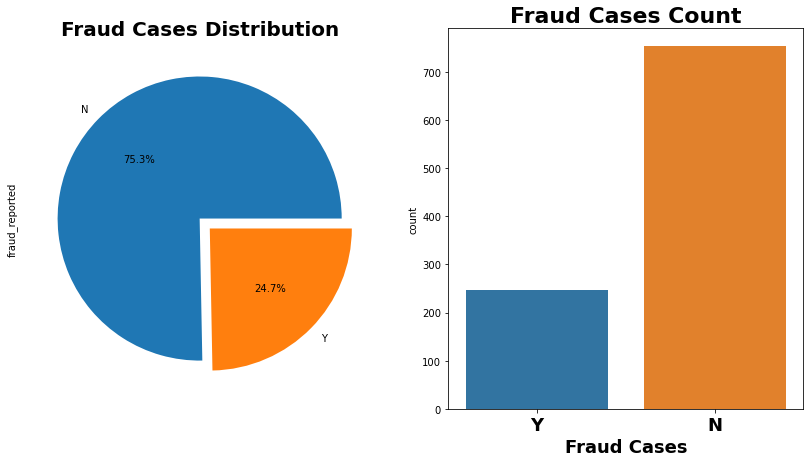

In [89]:
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                           ax=ax[0])
ax[0].set_title('Fraud Cases Distribution', fontsize=20,fontweight ='bold')

sns.countplot('fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()


In [90]:
#there is only 24.7% of fraudent cases reported
#'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.


Lets gain more insight of the independent variables vs target variables


In [91]:
#lets compare age with the fraudent cases

<AxesSubplot:xlabel='age', ylabel='Count'>

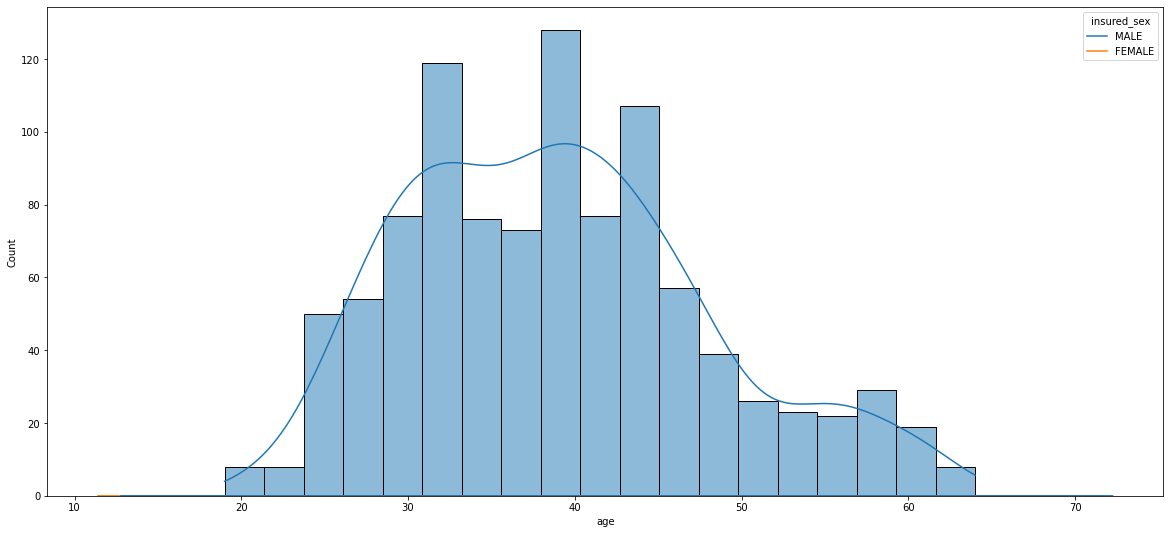

In [112]:
ax=plt.figure(20,figsize=(20,9))
sns.histplot(data=df.age,kde=True)
sns.kdeplot(x='age',hue='insured_sex',data=df)

<AxesSubplot:xlabel='age', ylabel='Density'>

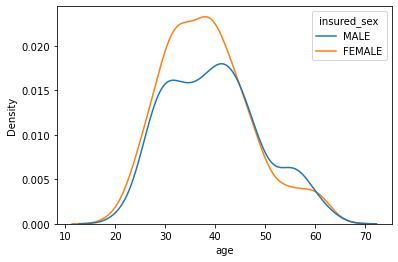

In [109]:
sns.kdeplot(x='age',hue='insured_sex',data=df)

#observations:
1. Maximum fraud cases comes from people with age group of 31-50 year.
2. Very few cases in 60+ year old peoples.
3. most of the females arein age grp of 30-50 are insured in camparsion to the males

In [ ]:
#Policy State Vs Fraud cases

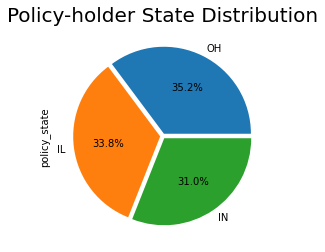

In [115]:
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%')
plt.title('Policy-holder State Distribution', fontsize=20)
plt.show()

<AxesSubplot:xlabel='policy_state'>

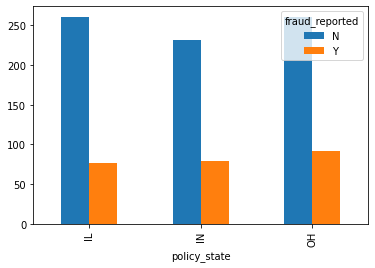

In [117]:
pd.crosstab(df['policy_state'], df['fraud_reported']).plot(kind='bar')

#Observation:
1. Almost same amout of cases come from each state.
2. Maximum fraud cases come from state of Ohio.

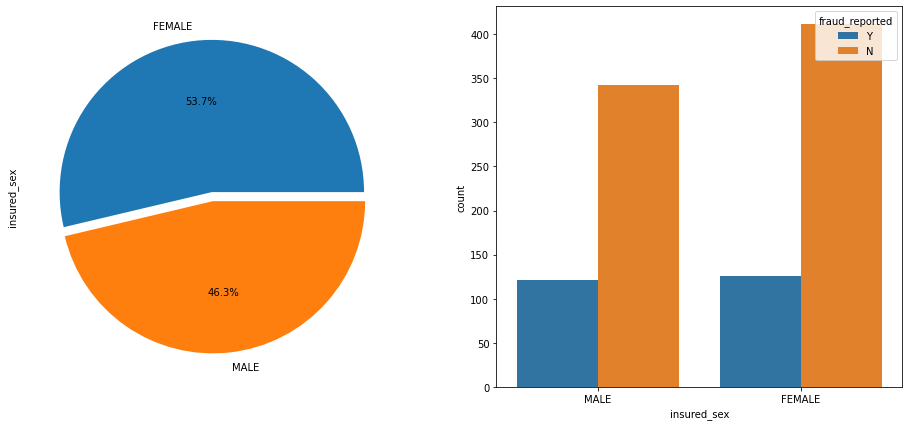

In [120]:
#Insured Gender VS Fraud cases
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',ax=ax[0])
                                    

sns.countplot(x="insured_sex", hue="fraud_reported", data=df)
plt.show()


#Comment :
1. Number of claims come from female is higher than which reported by male insured.
2. Almost same amount of fraud cases comes from same gender.

##Education_level vs Fraud cases

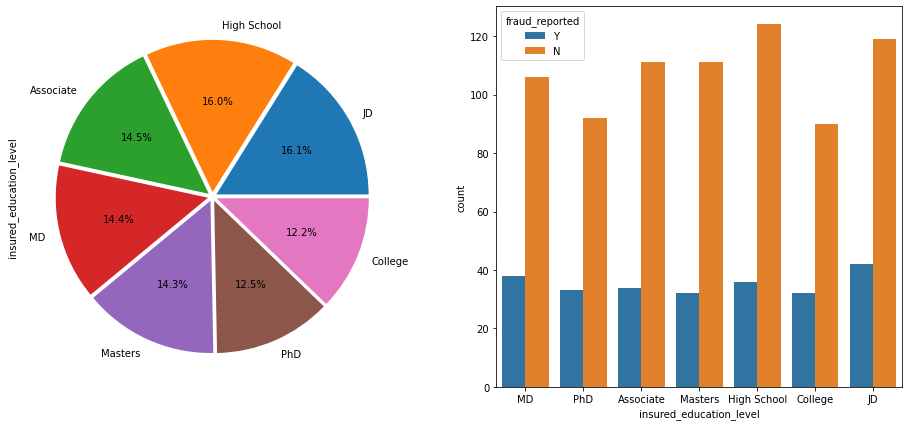

In [121]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],
                                                      autopct='%2.1f%%',ax=ax[0])
sns.countplot(x="insured_education_level", hue="fraud_reported", data=df)
plt.show()

In [125]:
pd.crosstab(df['insured_education_level'],df['fraud_reported'])

fraud_reported,N,Y
insured_education_level,,
Associate,111,34
College,90,32
High School,124,36
JD,119,42
MD,106,38
Masters,111,32
PhD,92,33


#Occupation of Insured Customers

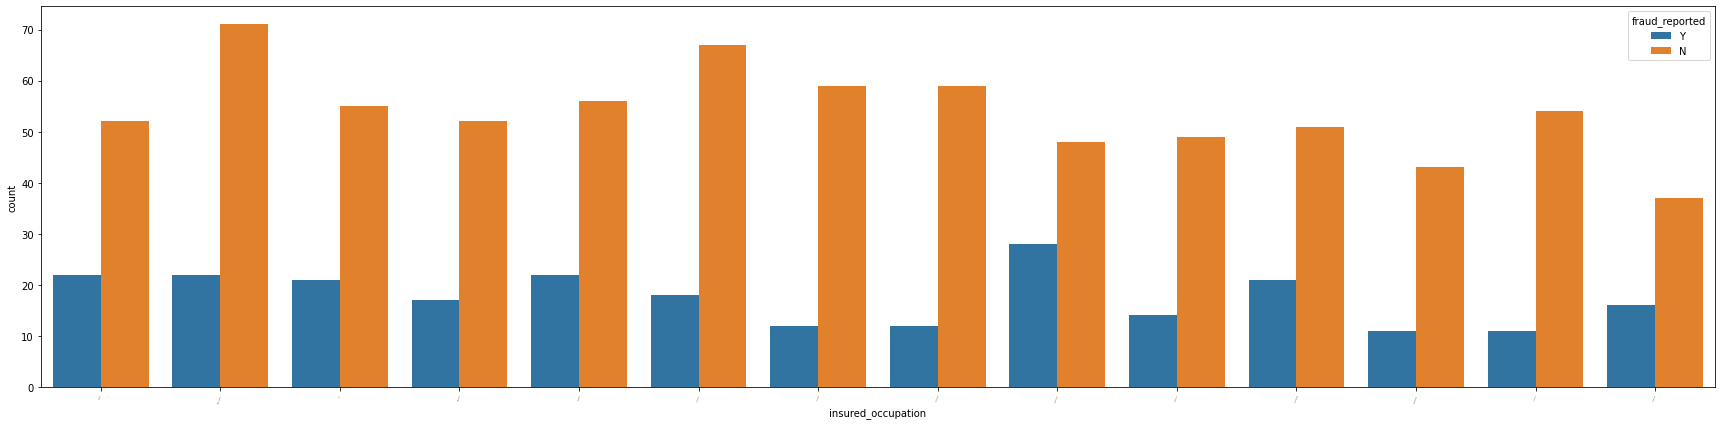

In [138]:
plt.figure(figsize=(30,7))
sns.countplot(x='insured_occupation',hue="fraud_reported",data=df)

plt.xticks( rotation=70,fontsize=1)
plt.show()

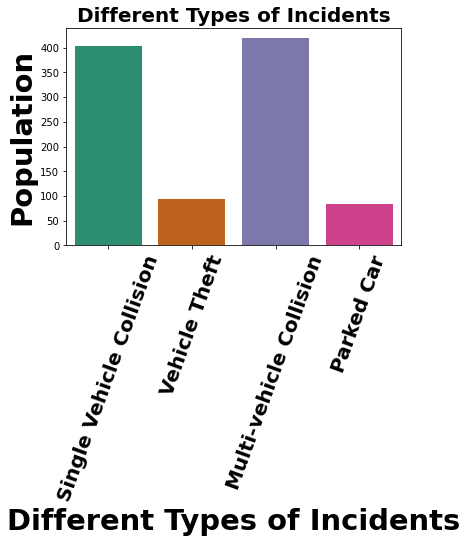

In [140]:
#Different Types of Incidents Vs Fraud cases
sns.countplot(df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=29,fontweight='bold')
plt.ylabel('Population', fontsize=29,fontweight='bold')
plt.xticks(fontweight ='bold',fontsize=20,
           rotation=70)
plt.show()

In [ ]:
ObservationS:
    1. people of all occupation are invovled in fraudent cases,infact people from higher managerial positions tends to have more cass.
    2.Most of the incients are either single vehicle collision or multi vehicle collision.

In [141]:
##noe let us explore the collision kinds

<Figure size 2016x1440 with 0 Axes>

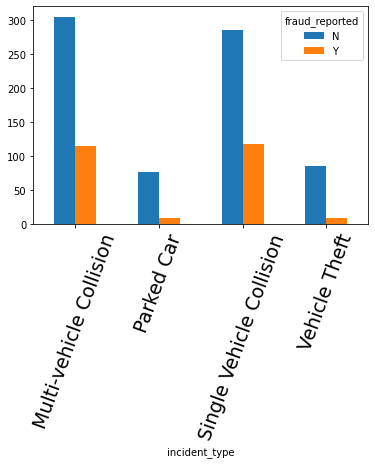

In [156]:
plt.figure(figsize=(28,20))
pd.crosstab(df['incident_type'], df['fraud_reported']).plot(kind = 'bar')
plt.xticks(rotation=70,fontsize=19)
plt.show()

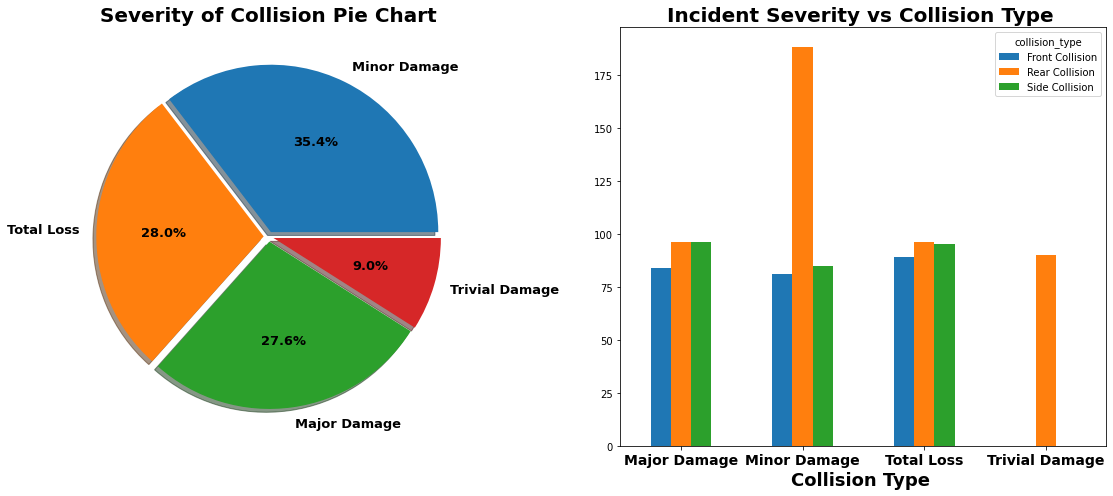

In [157]:
#Collision VS Incident Severity
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Multi-vehicle Collision'),
  Text(1, 0, 'Parked Car'),
  Text(2, 0, 'Single Vehicle Collision'),
  Text(3, 0, 'Vehicle Theft')])

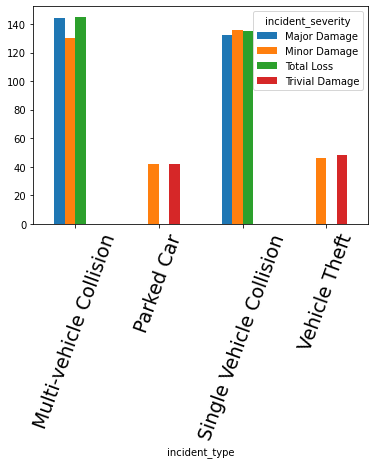

In [159]:
pd.crosstab(df['incident_type'], df['incident_severity']).plot(kind='bar')
plt.xticks(fontsize=19,rotation=70)

#
.  It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

<Figure size 1368x576 with 0 Axes>

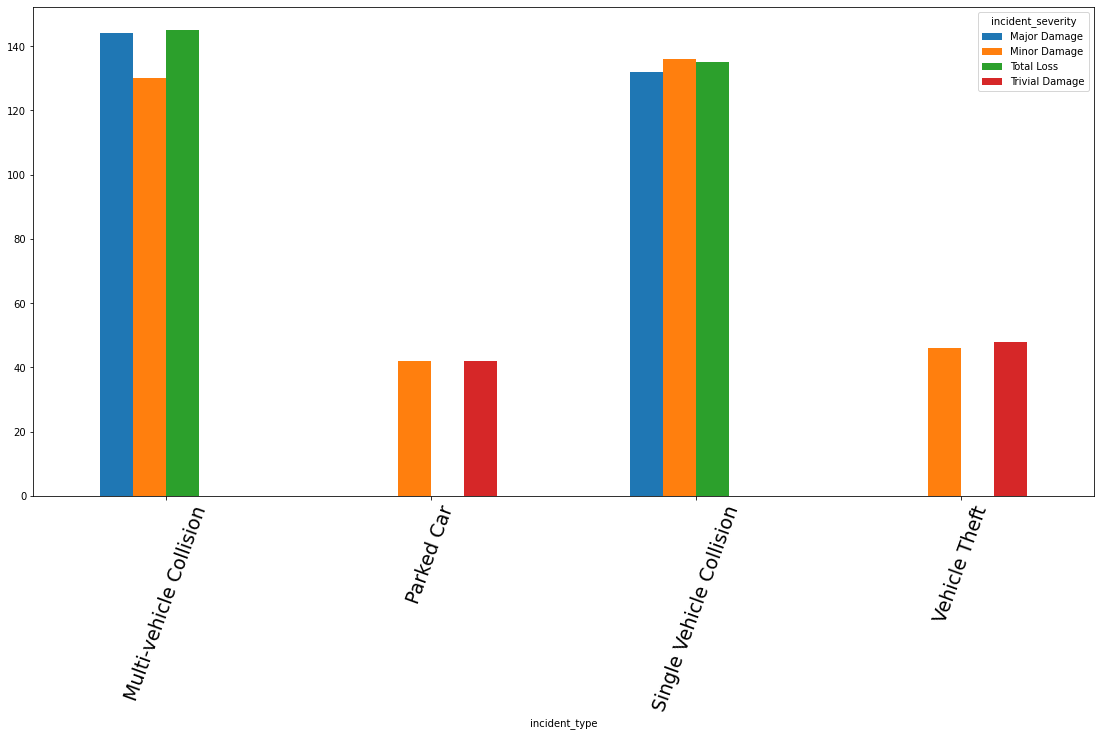

In [166]:
#Incident Type VS incident_severity

pd.crosstab(df['incident_type'], df['incident_severity']).plot(kind='bar',figsize=(19,9))
plt.xticks(fontsize=19,rotation=70)
plt.show()

# incident Type is important variable 


<AxesSubplot:xlabel='policy_state', ylabel='total_claim_amount'>

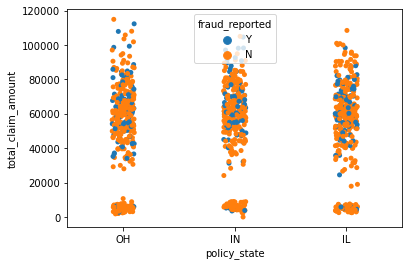

In [172]:

sns.stripplot(x="policy_state", y="total_claim_amount", hue="fraud_reported", data=df)


In [173]:
#CH ACCOUNTS FOR MX CLAIMN AMT AMG OTHER,THOUGH THERE IS LESS DIFFERENCE BETQEEN THEM.

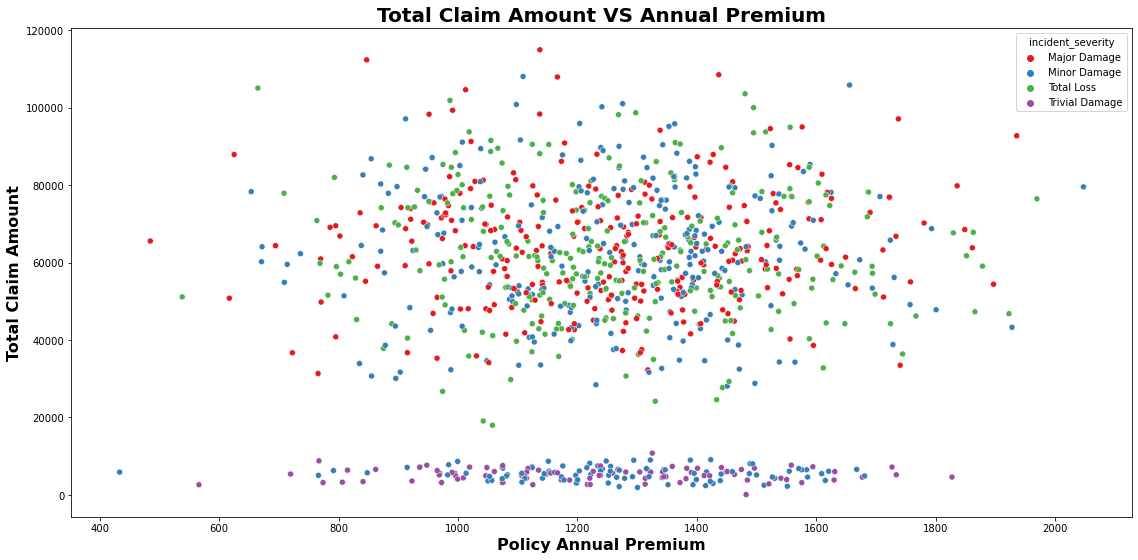

In [176]:
#Policy Annual Premium' VS TOTAL CLAIM AMT
plt.figure(figsize=(19,9))
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df.incident_severity, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

# Observations:
1. annual premium falls under 800-1600 category,hich accounts for total claim amt.
2. most of the total claim amt comes from Major and minor damage , and min comes from tirival damage.

# Encoding categorical data

In [177]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [178]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_model,fraud_reported,Automobile_Age,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,1,11,1,2,17,10,2014,25,1
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,12,1,8,1,2,27,6,2006,21,1
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,30,0,8,0,1,9,6,2000,22,2
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,34,1,1,1,2,25,5,1990,1,10
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,31,0,6,2,0,6,6,2014,17,2


# Feature selection and Engineering


#1. Outliers Detection and Removal

In [179]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']
len(Numerical)

21

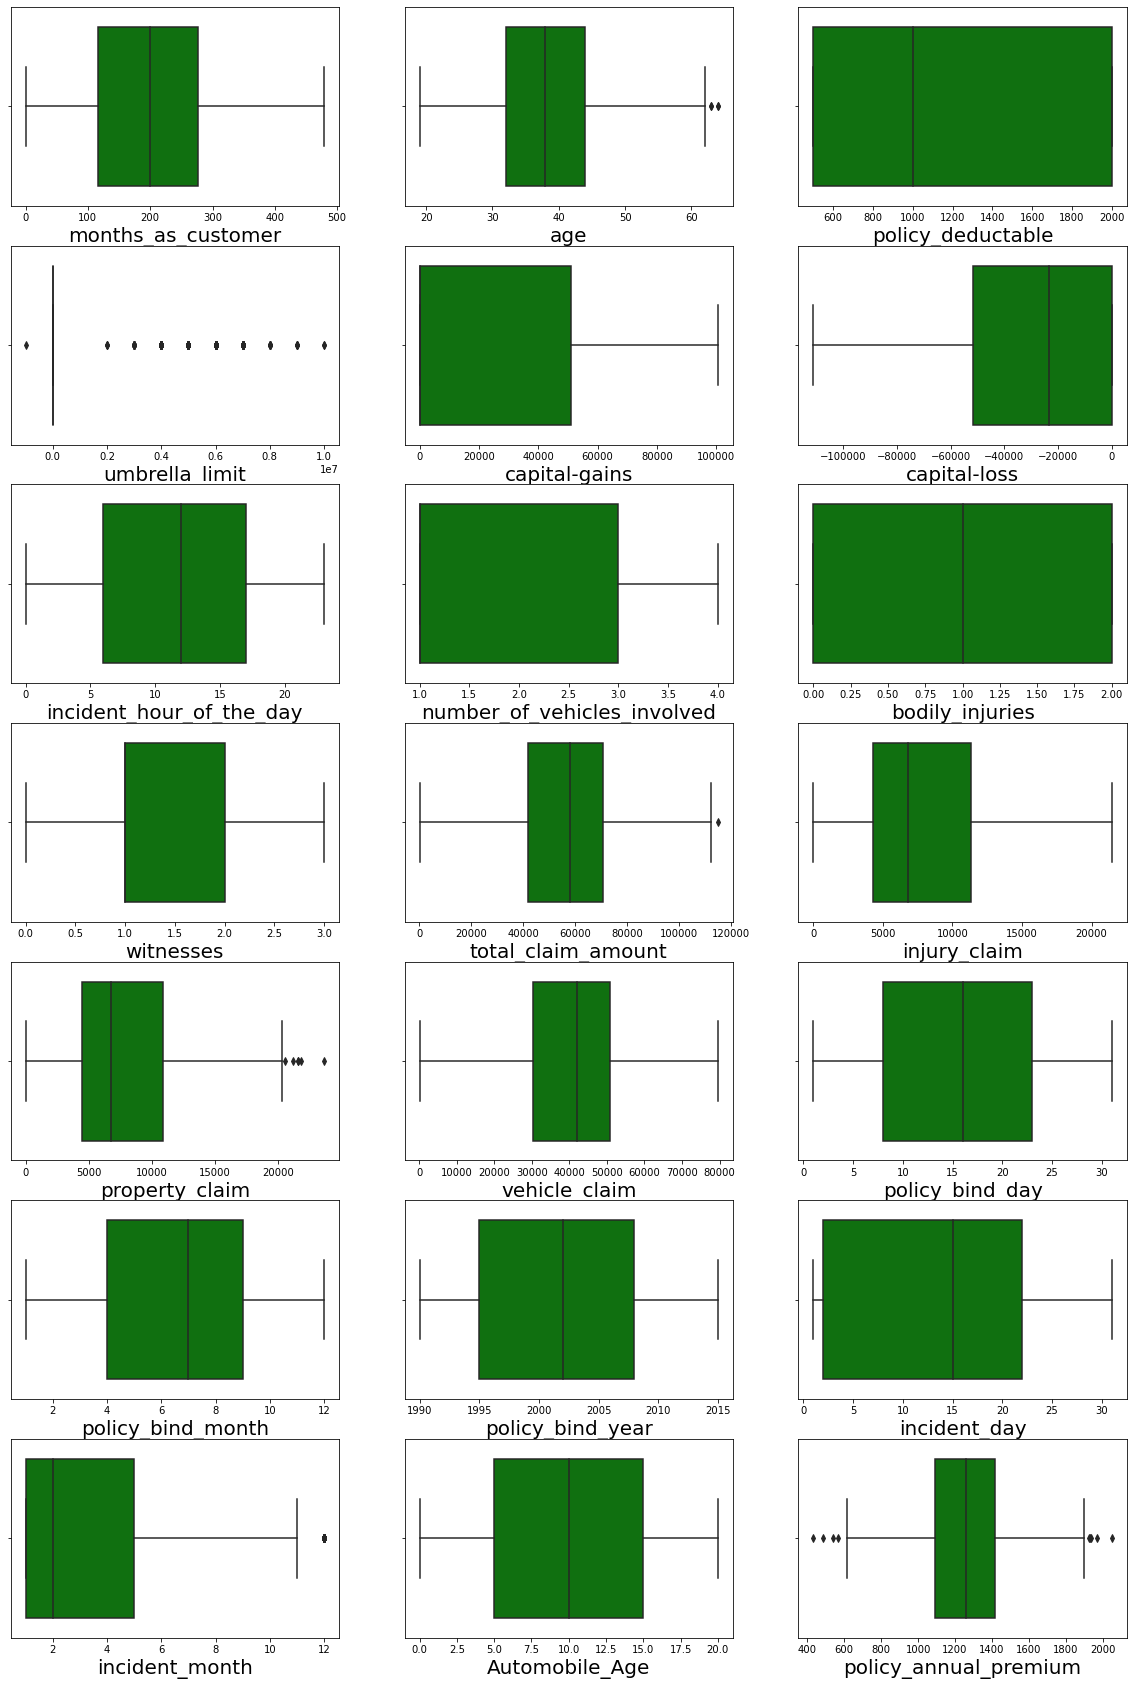

In [180]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [181]:
#From Boxplot we can see outliers exist dataset.

#Outliers removal using Zscore method


In [183]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df = df[(z<3).all(axis = 1)]


In [184]:
#2. Skewness of features

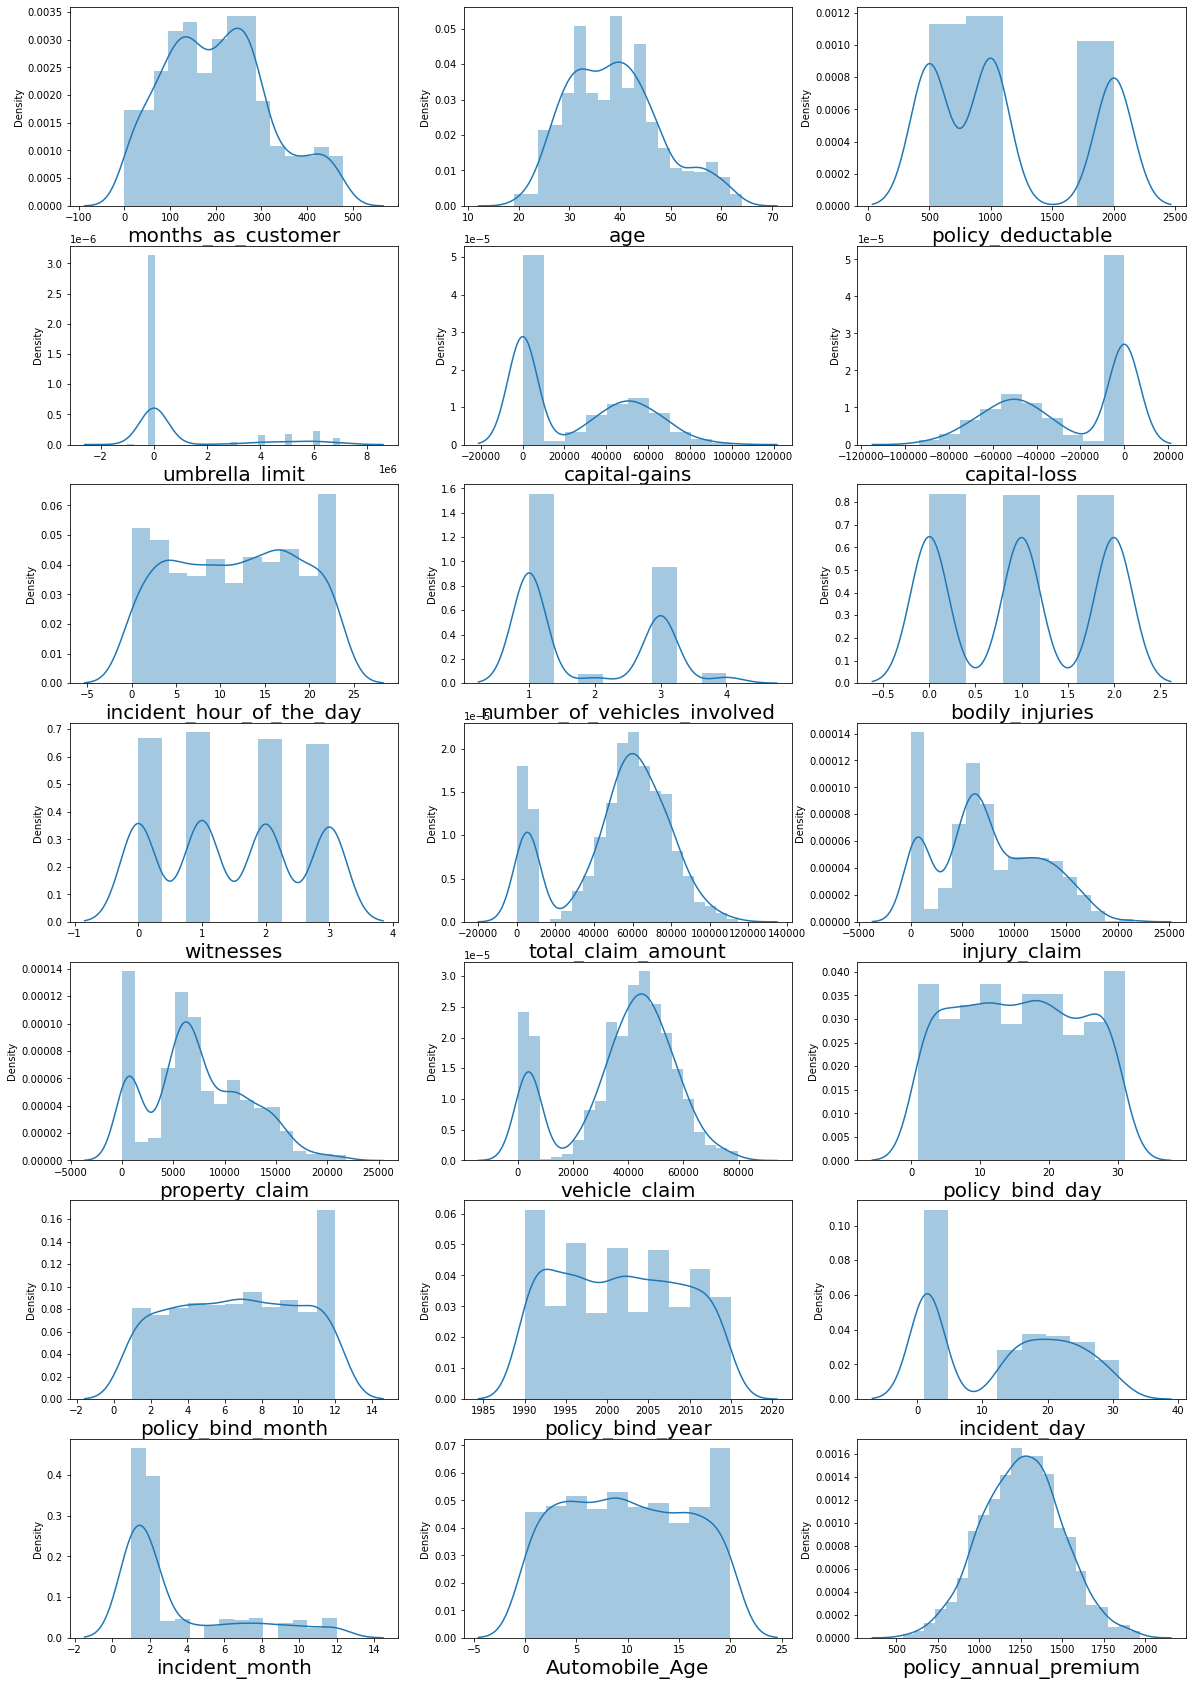

In [185]:
plt.figure(figsize=(20,30),facecolor='white')

plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [186]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.028152
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_day                   0.055443
incident_month                 1.388336
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

Out above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.

We will use yeo-johnson method to transform negatively skewed data.



In [187]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)


In [188]:
df[skew].skew()#rechecking

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

In [189]:
#skweness has reduced

3. Corrleation

In [190]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_model,fraud_reported,Automobile_Age,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
months_as_customer,1.000000,0.922960,-0.007183,0.031041,-0.003814,0.018213,0.059644,-0.000731,0.006925,-0.089358,...,0.005130,0.021285,-0.000869,-0.021855,0.007121,0.050824,0.004207,-0.041914,-0.010538,0.019242
age,0.922960,1.000000,-0.020012,0.032036,0.005330,0.013256,0.073790,0.001647,0.014798,-0.079099,...,0.015322,0.013279,-0.005594,-0.013323,0.011258,0.053147,0.014492,-0.031709,-0.005843,0.018221
policy_state,-0.007183,-0.020012,1.000000,0.017612,0.015089,-0.010921,-0.018002,-0.027173,-0.025357,-0.039501,...,-0.018008,0.034587,0.001160,0.001653,0.029007,-0.000583,0.073692,-0.003045,0.016049,0.027889
policy_deductable,0.031041,0.032036,0.017612,1.000000,-0.008300,0.013471,-0.006977,0.014101,-0.053888,-0.001923,...,-0.002591,0.015774,-0.030569,0.009912,-0.014554,0.013395,-0.054208,-0.054041,-0.018115,-0.010288
policy_annual_premium,-0.003814,0.005330,0.015089,-0.008300,1.000000,-0.014107,0.041312,-0.021400,0.027827,-0.014226,...,-0.038226,-0.012686,0.042446,0.032654,-0.001868,-0.032681,-0.031608,0.002433,0.018671,0.009544
umbrella_limit,0.018213,0.013256,-0.010921,0.013471,-0.014107,1.000000,0.018068,-0.030887,0.003973,-0.034098,...,0.015360,0.044729,-0.027952,0.013504,0.025418,-0.030416,-0.001072,0.049032,-0.031948,0.029210
insured_sex,0.059644,0.073790,-0.018002,-0.006977,0.041312,0.018068,1.000000,0.010068,-0.007440,-0.020928,...,-0.018657,0.020582,0.033336,-0.003405,0.071995,0.047690,-0.003125,-0.031230,-0.017208,0.036916
insured_education_level,-0.000731,0.001647,-0.027173,0.014101,-0.021400,-0.030887,0.010068,1.000000,-0.025394,0.025229,...,0.042735,0.013116,-0.054438,0.008337,-0.005150,0.018977,-0.011963,0.016874,-0.051772,0.069564
insured_occupation,0.006925,0.014798,-0.025357,-0.053888,0.027827,0.003973,-0.007440,-0.025394,1.000000,-0.010375,...,0.015152,0.000277,-0.000915,0.016461,-0.004376,0.003377,0.020690,-0.026467,-0.020565,0.013989
insured_hobbies,-0.089358,-0.079099,-0.039501,-0.001923,-0.014226,-0.034098,-0.020928,0.025229,-0.010375,1.000000,...,0.034818,-0.048181,0.018361,-0.003695,0.035959,0.035344,-0.003806,-0.020370,0.016051,-0.001147


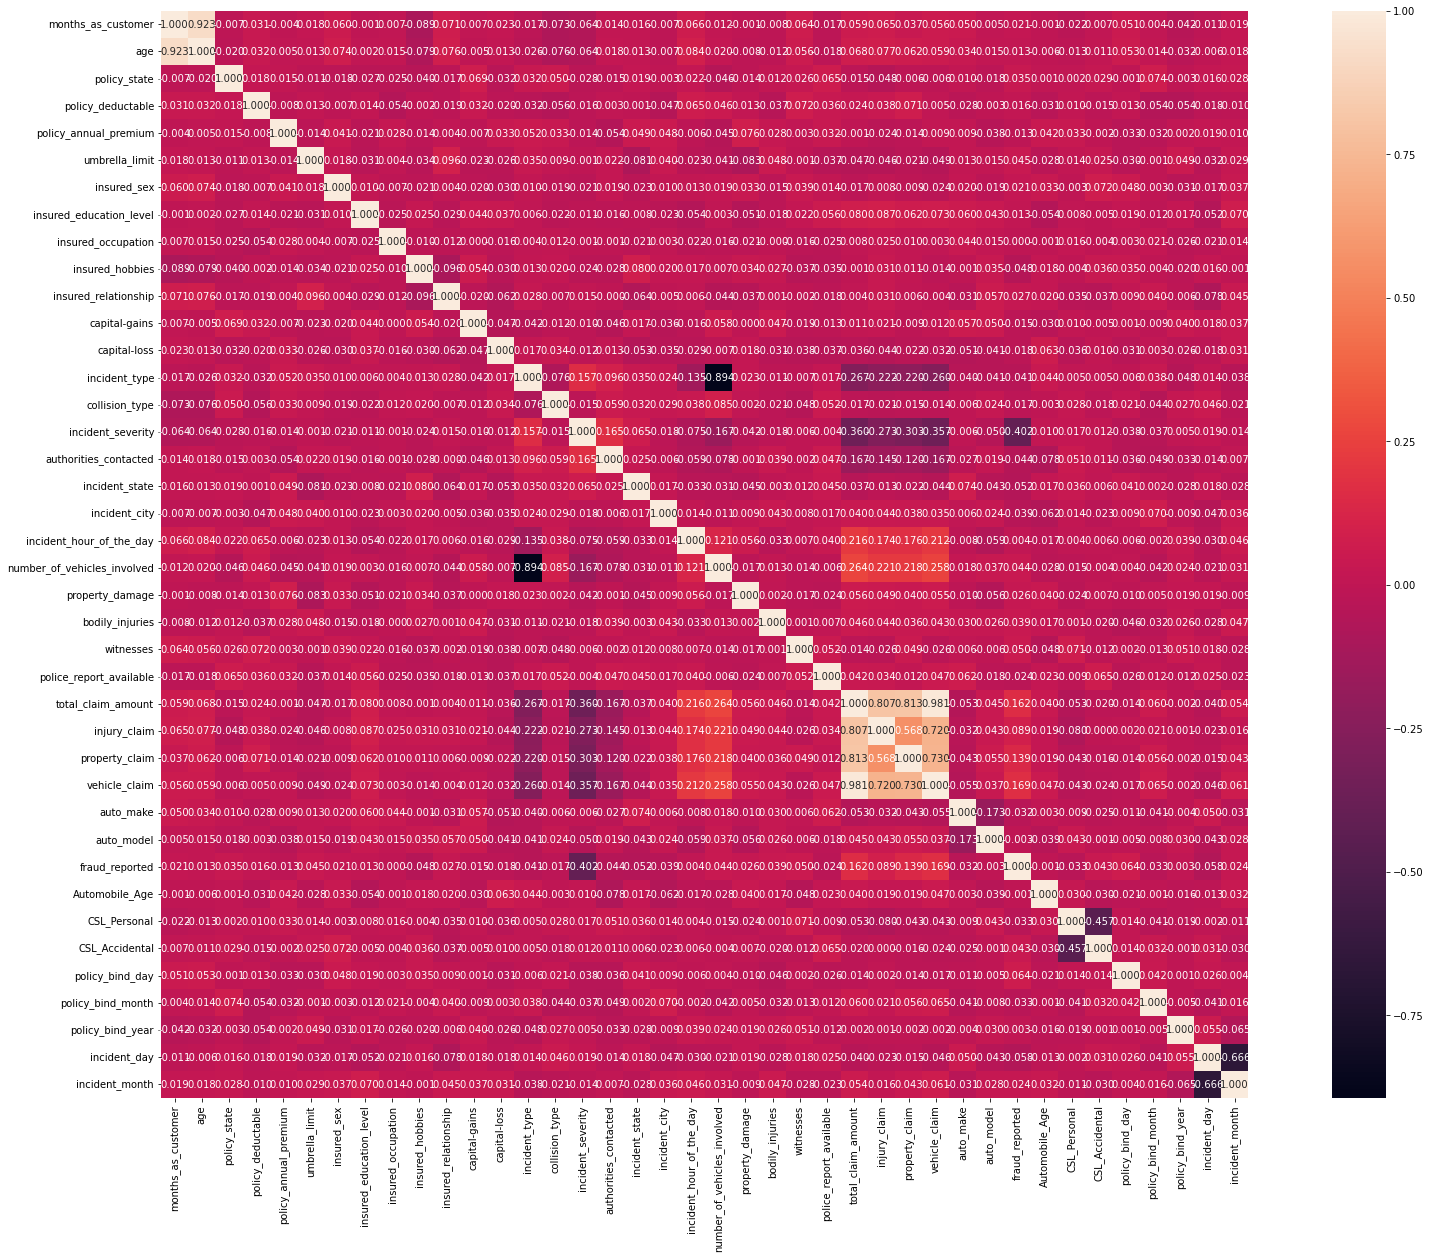

In [191]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),  annot=True, square=True, fmt='0.3f')
plt.show()

#observation:
Observation:
1. incident_severity is correlated with target variable with correlation of 0.4. Other variable are poorly correlated with target variable.
2. Other variable are poorly correlated with target variable.
3. injury_claim,property_claim,vehicle_claim are highly correlated with each other.
 4. incident_hour_of_the_day is highly negative correlated with incident type.

# 4. Balanceing Imbalanced target feature


In [192]:

df.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [193]:
#Balancing using SMOTE
pip install imbalanced-learn

SyntaxError: invalid syntax (2555917391.py, line 2)

In [194]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [195]:
import imblearn

In [196]:
from imblearn.over_sampling import SMOTE

In [197]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']


In [198]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [199]:
Y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [200]:
## target variable balanced... we r good to go

#Standard Scaling

In [201]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [202]:
#5. Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,7.877165,months_as_customer
1,7.859470,age
2,1.075582,policy_state
3,1.070714,policy_deductable
4,1.044249,policy_annual_premium
5,1.065279,umbrella_limit
6,1.085214,insured_sex
7,1.061002,insured_education_level
8,1.040971,insured_occupation
9,1.076974,insured_hobbies


#Strategy to Address Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.
3. We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.

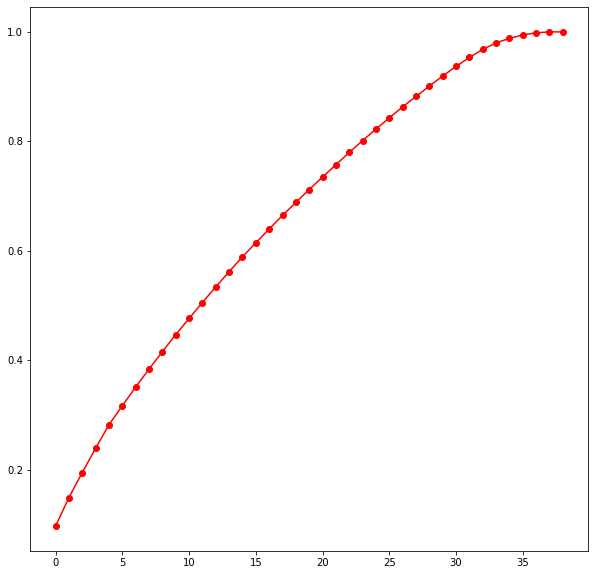

In [203]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')


#Comment -
AS per the graph, we can see that 29 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction.



In [205]:
pca_new = PCA(n_components=29)
x_new = pca_new.fit_transform(X_scale)
principle_x=pd.DataFrame(x_new,columns=np.arange(29))

# Machine Learning Model Building

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [207]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)


In [208]:
#Finding best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7995495495495496 on Random_state 167


In [209]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=167, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7995495495495496


Confusion matrix of Logistics Regression : 
 [[177  47]
 [ 42 178]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       224
           1       0.79      0.81      0.80       220

    accuracy                           0.80       444
   macro avg       0.80      0.80      0.80       444
weighted avg       0.80      0.80      0.80       444



In [210]:
#Applying other classification algorithm
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7995495495495496


Confusion matrix : 
 [[177  47]
 [ 42 178]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       224
           1       0.79      0.81      0.80       220

    accuracy                           0.80       444
   macro avg       0.80      0.80      0.80       444
weighted avg       0.80      0.80      0.80       444



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8265765765765766


Confusion matrix : 
 [[191  33]
 [ 44 176]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       224
           1       0.84      0.80      0.82       220

    accuracy                           0.83       444
   macro avg       0.83      0.83      0.83       444
weighted avg       0.83      0.83      0.83     

In [211]:
#CrossValidation :
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.60472973 0.69594595 0.79391892 0.8277027  0.86486486]
Mean Score : 0.7574324324324324
Std deviation : 0.09477299779103483




Cross Validation Score SVC() :

Score : [0.58445946 0.71621622 0.88851351 0.89864865 0.93581081]
Mean Score : 0.8047297297297297
Std deviation : 0.13369844397961864




Cross Validation Score GaussianNB() :

Score : [0.57094595 0.69932432 0.86148649 0.84459459 0.87162162]
Mean Score : 0.7695945945945946
Std deviation : 0.11736935761367695




Cross Validation Score DecisionTreeClassifier() :

Score : [0.59121622 0.64189189 0.75       0.72972973 0.75      ]
Mean Score : 0.6925675675675675
Std deviation : 0.06452614262872065




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.69594595 0.71959459 0.75337838 0.75675676 0.74324324]
Mean Score : 0.7337837837837837
Std deviation : 0.022953091556031126




Cross Validation Score RandomForestClassifier() :

Score : [0.61148649 0.72972973

In [212]:
#Hyper Parameter Tuning : GridSearchCV
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.808 total time=   0.3s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.816 total time=   0.2s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.812 total time=   0.2s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [213]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 400}

In [214]:
#Final Model
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))


Accuracy Score :
 0.8716216216216216


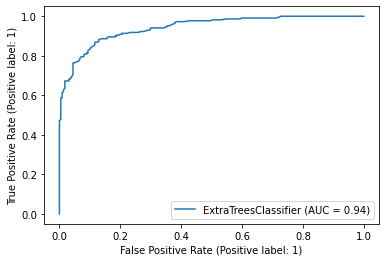

In [215]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   


plt.show()


In [216]:
#Saving model
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']